In [3]:
import numpy as np
import pandas as pd

from sas7bdat import SAS7BDAT    # SAS data parser
import h5py                      # A lib for reading HDF5 files
import scipy.io                  # This will help us import Matlab .mat files
import pickle                    # Pickle lib for pickle files
from sqlalchemy import create_engine


import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Importing data from files

## Excel

* **pd.read_excel()** read excel files into the DataFrame.


* If you want to import **all sheets** use **sheet_name=None**:

        xl = pd.read_excel(url, sheetname=None)
        
* To list all sheets use **xl.keys()**

In [6]:
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

# Read in all sheets of Excel file: xl
xl = pd.read_excel(url, sheet_name=None)

# Print the sheetnames to the shell
xl.keys()

odict_keys(['1700', '1900'])

In [7]:
xl['1900'].head(2)

,country,1900
0,Afghanistan,34.565000
1,Akrotiri and Dhekelia,34.616667


## Pickle

In [143]:
example = {'a': 1, 'b': 2}

In [145]:
# Let's pickle the example
with open('pickle_exmpl.pkl', 'wb') as pkl:
    pickle.dump(example, pkl)

In [149]:
# ONow let's open this pickle file and load data: d
with open('pickle_exmpl.pkl', 'rb') as file:
    d = pickle.load(file)

# Print d
d 

{'a': 1, 'b': 2}

## Pandas

* #### .read_csv() - helpful arguments

        sep='\t'
        nrows=n
        comment='#' 
        na_values='Something'
        

## SAS & Stata

* ### SAS

In [3]:
with SAS7BDAT(r'C:\Users\Ol\Documents\DATA ANALYSIS\sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

In [6]:
df_sas.head(2)

,YEAR,P,S
0,1950.0,12.9,181.899994
1,1951.0,11.9,245.000000


* ### SAS and pandas: pd.read_sas() 

In [7]:
# But there's another possibility (at least in pandas 0.22):
df_sas_native = pd.read_sas(r'C:\Users\Ol\Documents\DATA ANALYSIS\sales.sas7bdat')

In [8]:
df_sas_native.head(2)

,YEAR,P,S
0,1950.000402,12.9,181.899994
1,1951.000833,11.9,245.000000


* ### Stata

In [9]:
disa = pd.read_stata(r'C:\Users\Ol\Documents\DATA ANALYSIS\disarea.dta')

In [10]:
disa.head(2)

,wbcode,country,disa1,disa2,disa3,disa4,disa5,disa6,disa7,disa8,...,disa16,disa17,disa18,disa19,disa20,disa21,disa22,disa23,disa24,disa25
0,AFG,Afghanistan,0.00,0.00,0.76,0.73,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.02,0.00,0.0
1,AGO,Angola,0.32,0.02,0.56,0.00,0.0,0.0,0.56,0.0,...,0.0,0.4,0.0,0.61,0.0,0.0,0.99,0.98,0.61,0.0


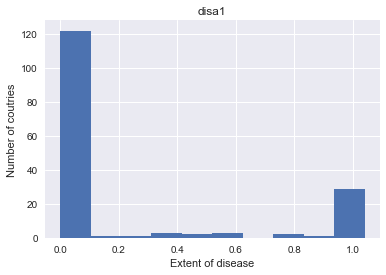

In [15]:
pd.DataFrame.hist(disa[['disa1']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of coutries')
plt.show()

## HDF5 files

In [18]:
hdf5 = h5py.File(r'C:\Users\Ol\Documents\DATA ANALYSIS\H-H1_LOSC_4_V2-1126259446-32.hdf5', 'r')

In [20]:
for key in hdf5.keys():
    print(key)

meta
quality
strain


In [29]:
for key in hdf5['strain']:
    print(key)

Strain


In [32]:
LIGO_timeseries = hdf5['strain']['Strain'].value

In [33]:
# Create a time vector
time_vec = time = np.arange(0, 1, 1/len(LIGO_timeseries))

In [34]:
time_vec

array([0.00000000e+00, 7.62939453e-06, 1.52587891e-05, ...,
       9.99977112e-01, 9.99984741e-01, 9.99992371e-01])

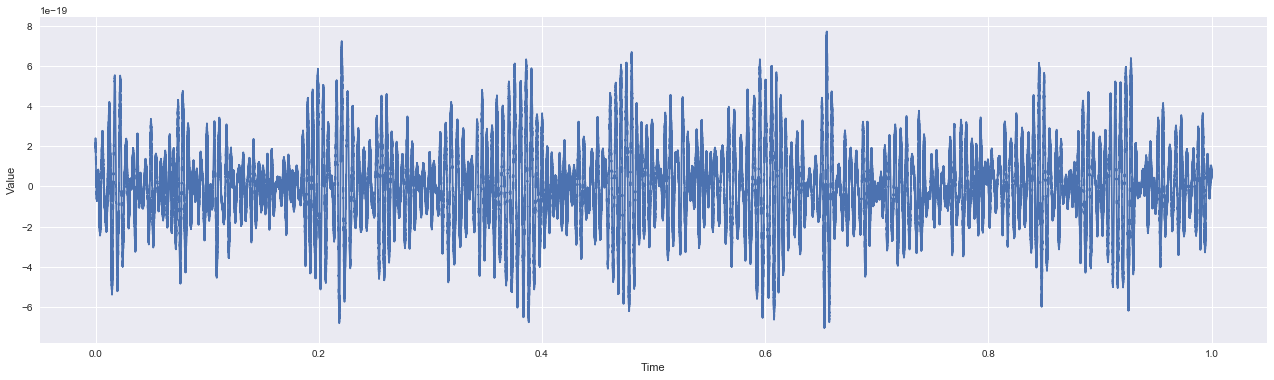

In [70]:
plt.figure(figsize=(22,6))
plt.plot(time_vec, LIGO_timeseries)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [55]:
hdf5['meta']['DescriptionURL'].value

b'http://losc.ligo.org/'

## Matlab

In [60]:
mat = scipy.io.loadmat(r'C:\Users\Ol\Documents\DATA ANALYSIS\lev_ann.mat')

In [62]:
type(mat)

dict

In [63]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'c'])

In [74]:
mat['__header__']

b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Oct 31 03:04:01 2002'

In [71]:
np.mean(mat['c'])

49168.95631266367

## Relational databases

* ### SQLite

In [113]:
engine = create_engine(r'sqlite:///C:\Users\Ol\Documents\DATA ANALYSIS\chinook.db')

In [78]:
engine.table_names()

['albums',
 'artists',
 'customers',
 'employees',
 'genres',
 'invoice_items',
 'invoices',
 'media_types',
 'playlist_track',
 'playlists',
 'sqlite_sequence',
 'sqlite_stat1',
 'tracks']

In [81]:
with engine.connect() as con:
    rs = con.execute("SELECT LastName, Title FROM employees")
    df = pd.DataFrame(rs.fetchmany(3))
    df.columns = rs.keys()

In [82]:
df

,LastName,Title
0,Adams,General Manager
1,Edwards,Sales Manager
2,Peacock,Sales Support Agent


In [135]:
with engine.connect() as con:
    rs = con.execute("SELECT * FROM employees WHERE Country LIKE '%A' ORDER BY BirthDate DESC")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

In [136]:
df.head(2)

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
1,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com


* ### SQLite and pandas SQL queries

In [137]:
# We create engine using sqlite
engine = create_engine(r'sqlite:///C:\Users\Ol\Documents\DATA ANALYSIS\chinook.db')

In [140]:
df = pd.read_sql_query('SELECT * FROM albums', engine)

In [141]:
df.sample(3)

,AlbumId,Title,ArtistId
60,61,Knocking at Your Back Door: The Best Of Deep P...,58
211,212,Beyond Good And Evil,139
201,202,Rotten Apples: Greatest Hits,131


* ### INNER JOIN

<br>

* using **sqlite**:

In [122]:
with engine.connect() as con:
    
    rs = con.execute("SELECT Title, Name FROM albums INNER JOIN artists on\
    albums.ArtistId = artists.ArtistId")
    
    df_join = pd.DataFrame(rs.fetchall())
    df_join.columns = rs.keys()

df_join.head(2)

,Title,Name
0,For Those About To Rock We Salute You,AC/DC
1,Balls to the Wall,Accept


* using **pandas**:

In [133]:
df_pnds_join = pd.read_sql_query("SELECT * FROM playlist_track \
INNER JOIN tracks ON playlist_track.TrackId = tracks.TrackId \
WHERE Milliseconds < 250000", engine)

df_pnds_join.head(2)

,PlaylistId,TrackId,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,3,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
1,5,3,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
